In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [4]:
data = pd.read_csv('/content/netflix1.csv')
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [6]:
# Step 3: Initial Inspection
data.info()
print("\nMissing Values:\n", data.isnull().sum())
print("\nShape:", data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB

Missing Values:
 show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Shape: (8790, 10)


In [7]:
# Step 4: Data Cleaning
# Drop duplicates
data.drop_duplicates(inplace=True)

# Handle missing values
data.replace('Not Given', np.nan, inplace=True)
data.dropna(subset=['director', 'country'], inplace=True)

# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Remove rows with invalid dates
data = data[~data['date_added'].isnull()]

# Create 'year', 'month', 'day' columns
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5915 entries, 0 to 6569
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5915 non-null   object        
 1   type          5915 non-null   object        
 2   title         5915 non-null   object        
 3   director      5915 non-null   object        
 4   country       5915 non-null   object        
 5   date_added    5915 non-null   datetime64[ns]
 6   release_year  5915 non-null   int64         
 7   rating        5915 non-null   object        
 8   duration      5915 non-null   object        
 9   listed_in     5915 non-null   object        
 10  year          5915 non-null   int32         
 11  month         5915 non-null   int32         
 12  day           5915 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(1), object(8)
memory usage: 577.6+ KB


<ipython-input-8-0fb5417ced4d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='type', palette='Set2')


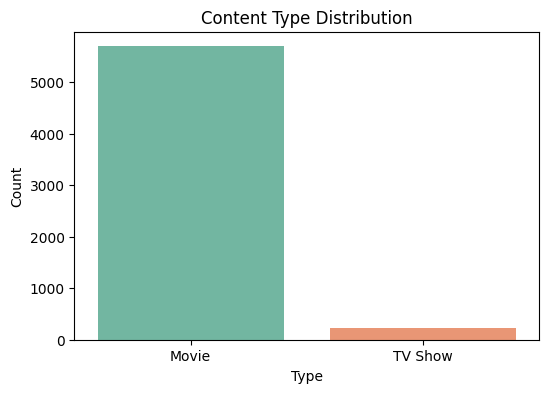

In [8]:
# Step 5: Content Type Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='type', palette='Set2')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

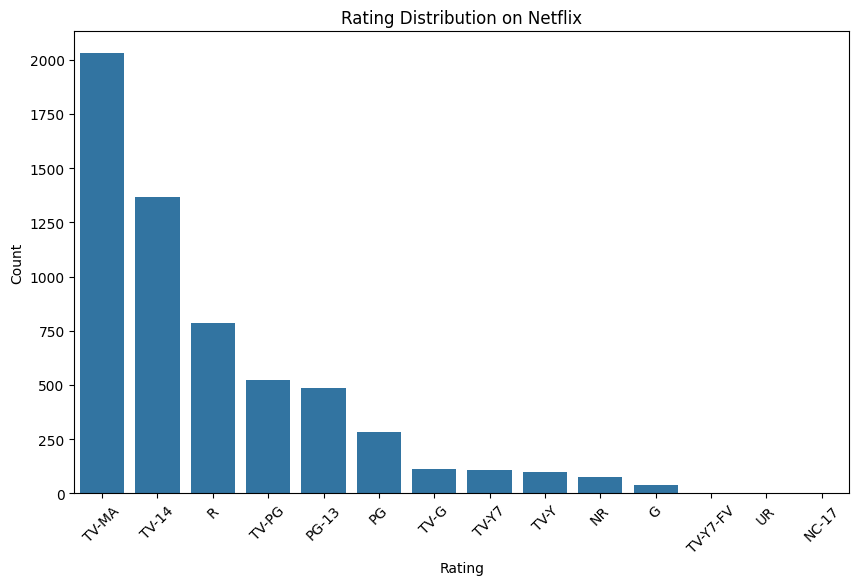

In [9]:
# Step 6: Rating Distribution
rating_counts = data['rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xticks(rotation=45)
plt.title('Rating Distribution on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

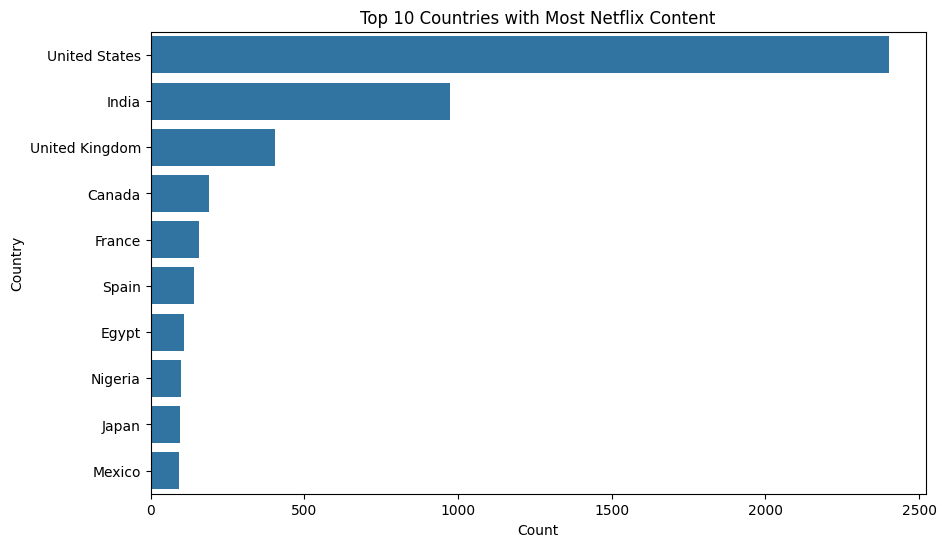

In [10]:
# Step 7: Top 10 Countries
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

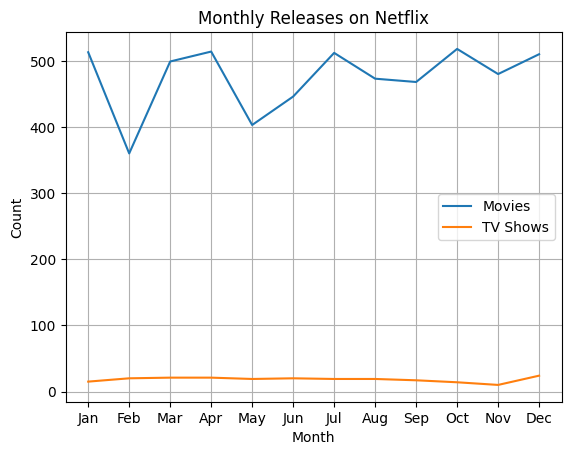

In [11]:
# Step 8: Monthly and Yearly Releases
monthly_movies = data[data['type'] == 'Movie']['month'].value_counts().sort_index()
monthly_shows = data[data['type'] == 'TV Show']['month'].value_counts().sort_index()

plt.plot(monthly_movies.index, monthly_movies.values, label='Movies')
plt.plot(monthly_shows.index, monthly_shows.values, label='TV Shows')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                          'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Releases on Netflix')
plt.legend()
plt.grid(True)
plt.show()

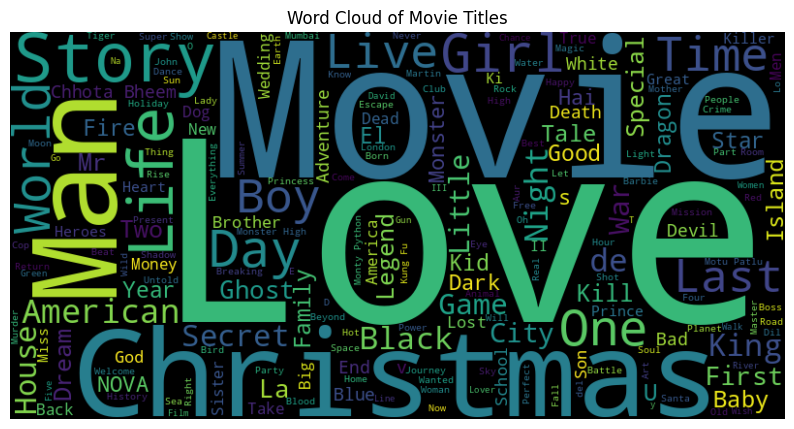

In [12]:
# Step 9: Word Cloud of Movie Titles
movie_titles = data[data['type'] == 'Movie']['title']

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()